## Модели регрессии для недвижимости Бостона

Этот датасет содержит информацию о ценах на жилье в пригородах Бостона, США, собранную в 1978 году Бюро переписи населения США.

Общая статистика датасета:

- Общее количество записей: 506 наблюдений

- Количество признаков: 13 социально-экономических и экологических характеристик районов

- Средняя стоимость домов: 22,533 тысячи долларов США

- Диапазон цен: от 5,000 до 50,000 тысяч долларов США

Данные содержат следующие столбцы:

Целевая переменная:

- MEDV (Median Value) - Медианная стоимость домов в районе (в тысячах долларов США)

Признаки (факторы, влияющие на стоимость):

- CRIM - Уровень преступности на душу населения по городам

- ZN - Доля жилых земель, зонированных под участки площадью более 25,000 кв. футов

- INDUS - Доля акров неторгового бизнеса на город

- CHAS - Фиктивная переменная реки Чарльз (1 - участок граничит с рекой, 0 - не граничит)

- NOX - Концентрация оксидов азота (частей на 10 миллионов)

- RM - Среднее количество комнат в жилищах района

- AGE - Доля занятых единиц жилья, построенных до 1940 года

- DIS - Взвешенные расстояния до пяти центров занятости Бостона

- RAD - Индекс доступности радиальных магистралей

- TAX - Полная ставка налога на имущество за 10,000 долларов США

- PTRATIO - Соотношение учеников и учителей по городам

- B - Показатель расового состава: 1000(Bk - 0.63)^2, где Bk - доля афроамериканцев

- LSTAT - Процент населения с более низким социально-экономическим статусом

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

### Загрузка данных

In [3]:
df = pd.read_csv('BostonHousing.csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


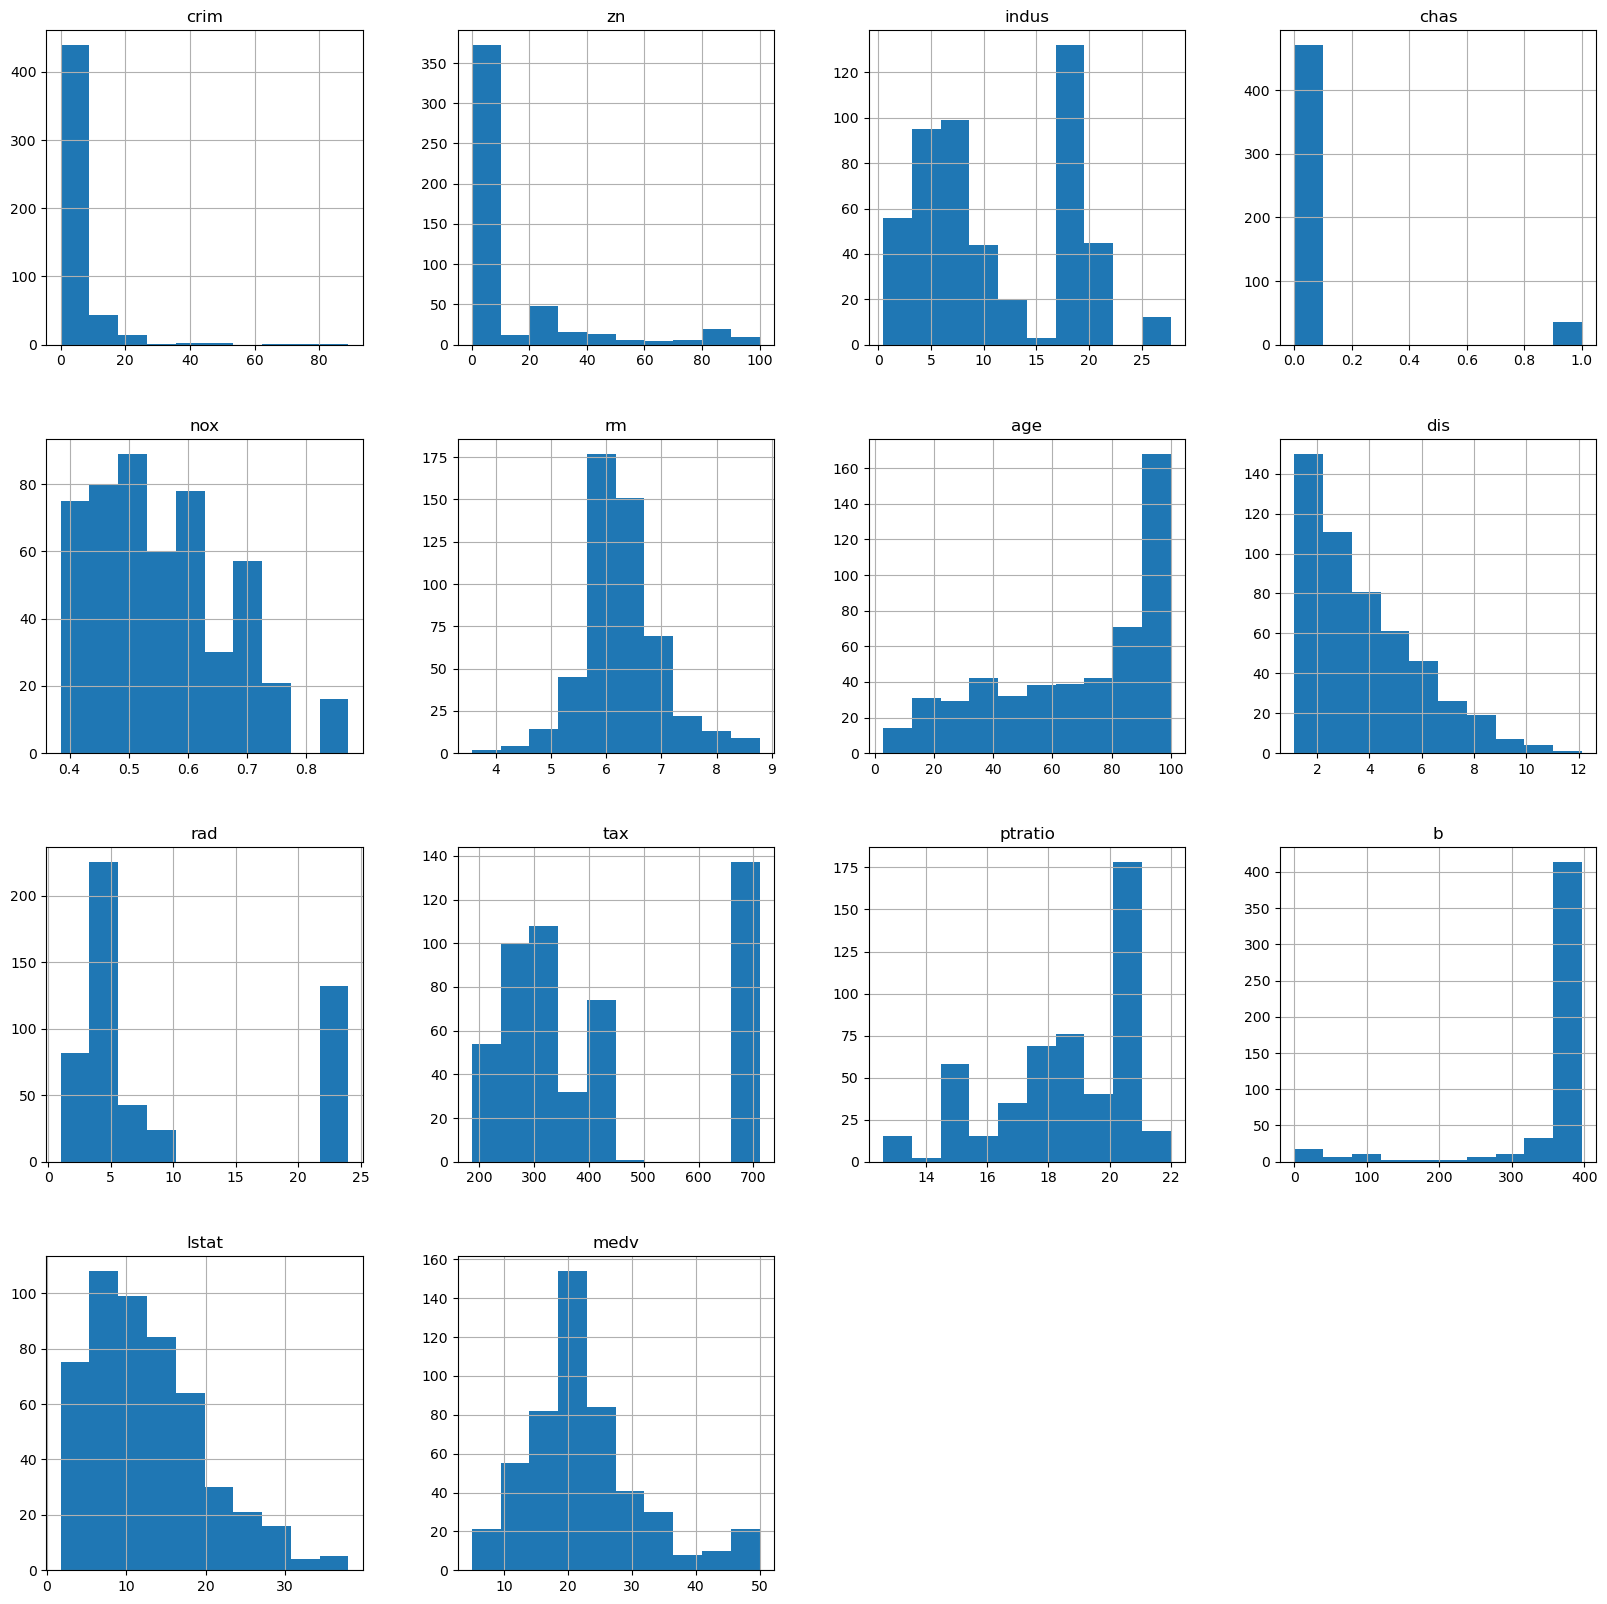

In [8]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

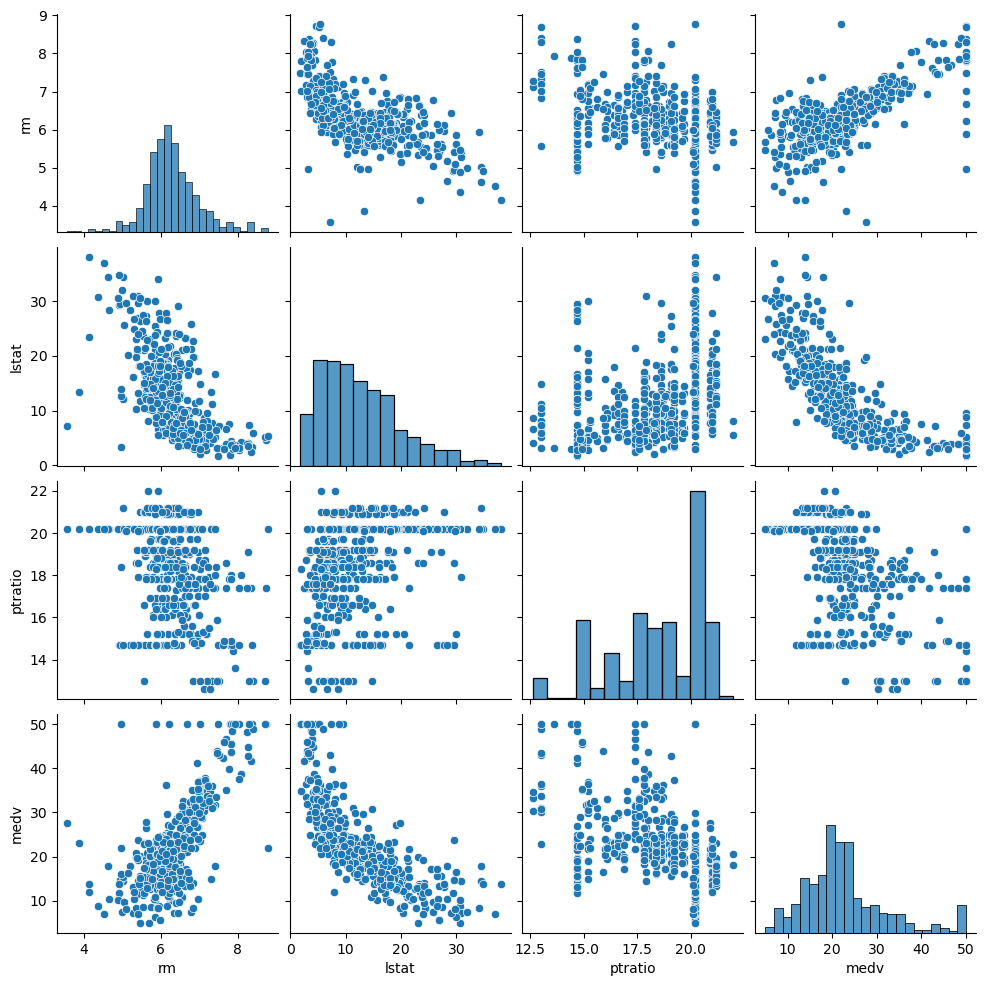

In [9]:
plt.figure(figsize=(8,6))
sns.pairplot(df[['rm', 'lstat', 'ptratio', 'medv']])

<Axes: xlabel='medv', ylabel='Density'>

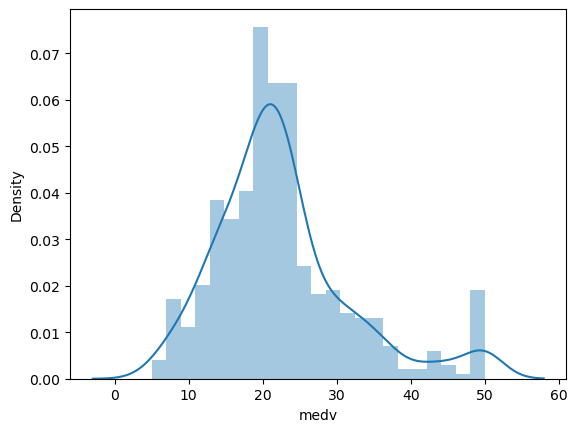

In [10]:
sns.distplot(df['medv'])

__Распределение MEDV (стоимости жилья) показывает положительную асимметрию - большинство домов сосредоточено в диапазоне 15-25 тысяч долларов, с относительно небольшим количеством дорогих домов/объектов (выше 40 тысяч). Это типично для рынка недвижимости, где преобладает жилье среднего ценового сегмента.__

<Axes: xlabel='rm', ylabel='medv'>

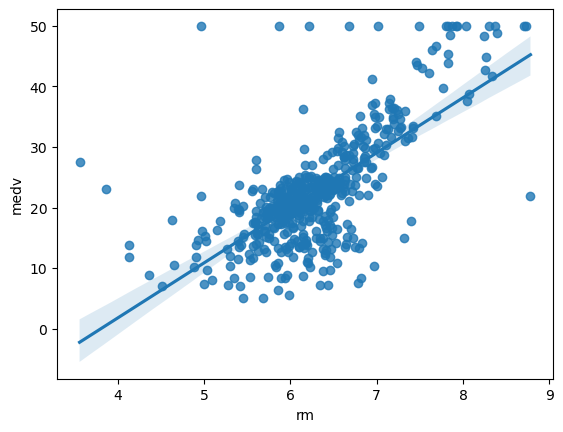

In [11]:
sns.regplot(y='medv', x='rm', data=df)

__Наблюдается сильная положительная линейная зависимость между средним количеством комнат (RM) и стоимостью жилья (MEDV). Коэффициент корреляции 0.7 указывает на то, что количество комнат является одним из ключевых факторов, влияющих на цену: чем больше комнат, тем выше стоимость жилья.__

In [12]:
df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']].corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
zn,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
indus,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
chas,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
nox,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
rm,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
age,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
dis,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
rad,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
tax,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


<Axes: >

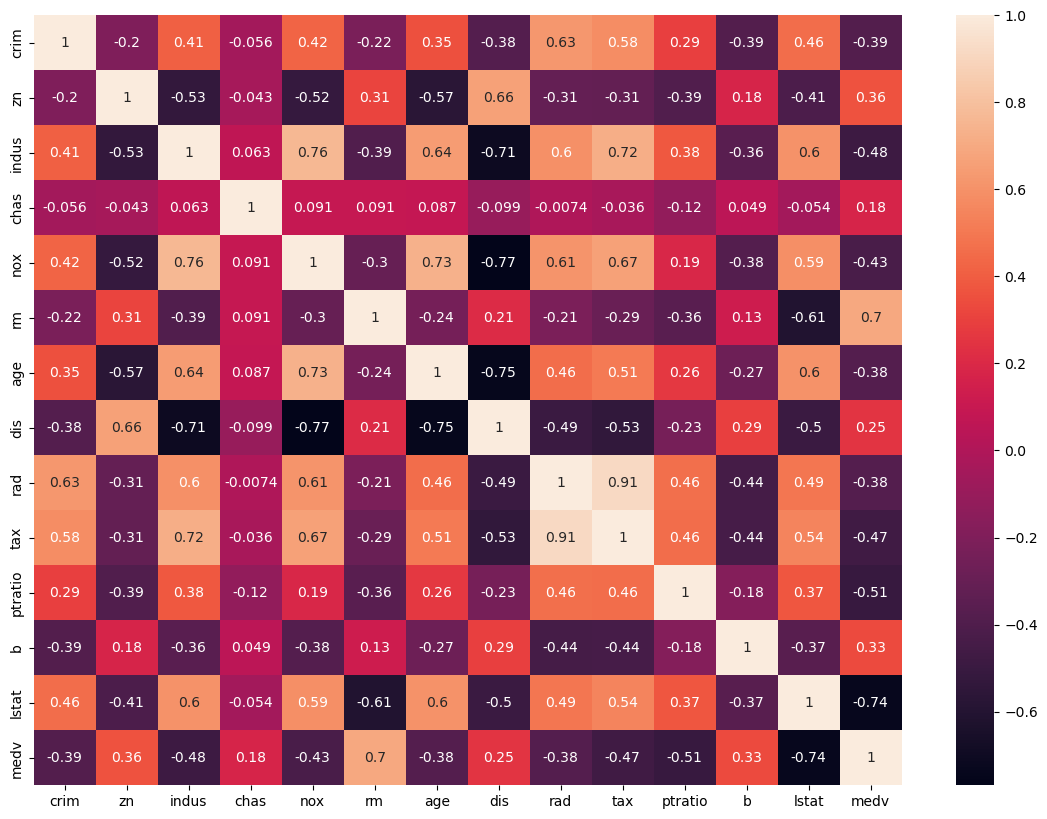

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']].corr(), annot=True)

### Сильные положительные корреляции:

- __TAX__ (*Полная ставка налога на имущество*) и __RAD__ (*Индекс доступности радиальных магистралей*) - высокие налоги связаны с лучшей транспортной доступностью → __(0.91)__

- __NOX__ (*Концентрация оксидов азота*) и __INDUS__ (*Доля акров неторгового бизнеса на город*) - промышленные районы имеют более загрязненный воздух → __(0.76)__

### Сильные отрицательные корреляции:

- __DIS__ (*Взвешенные расстояния до пяти центров занятости Бостона*) и __NOX__ (*Концентрация оксидов азота*) - чем дальше от центра, тем чище воздух → __(-0.77)__

- __DIS__ (*Взвешенные расстояния до пяти центров занятости Бостона*) и __INDUS__ (*Доля акров неторгового бизнеса на город*) - промышленные предприятия расположены ближе к центру → __(-0.71)__

- __MEDV__ (*Медианная стоимость домов в районе*) и __LSTAT__ (*Процент населения с более низким социально-экономическим статусом*) - чем выше процент малоимущих, тем ниже стоимость жилья → __(-0.74)__

### Целевая переменная MEDV:

- Наиболее сильная положительная связь с __RM__ (*Среднее количество комнат в жилищах района*) → __(+0.7)__

- Наиболее сильная отрицательная связь с __LSTAT__ (*Процент населения с более низким социально-экономическим статусом*) (-0.74) и __PTRATIO__ (*Соотношение учеников и учителей по городам*) → __(-0.51)__

<Axes: xlabel='Room Count', ylabel='medv'>

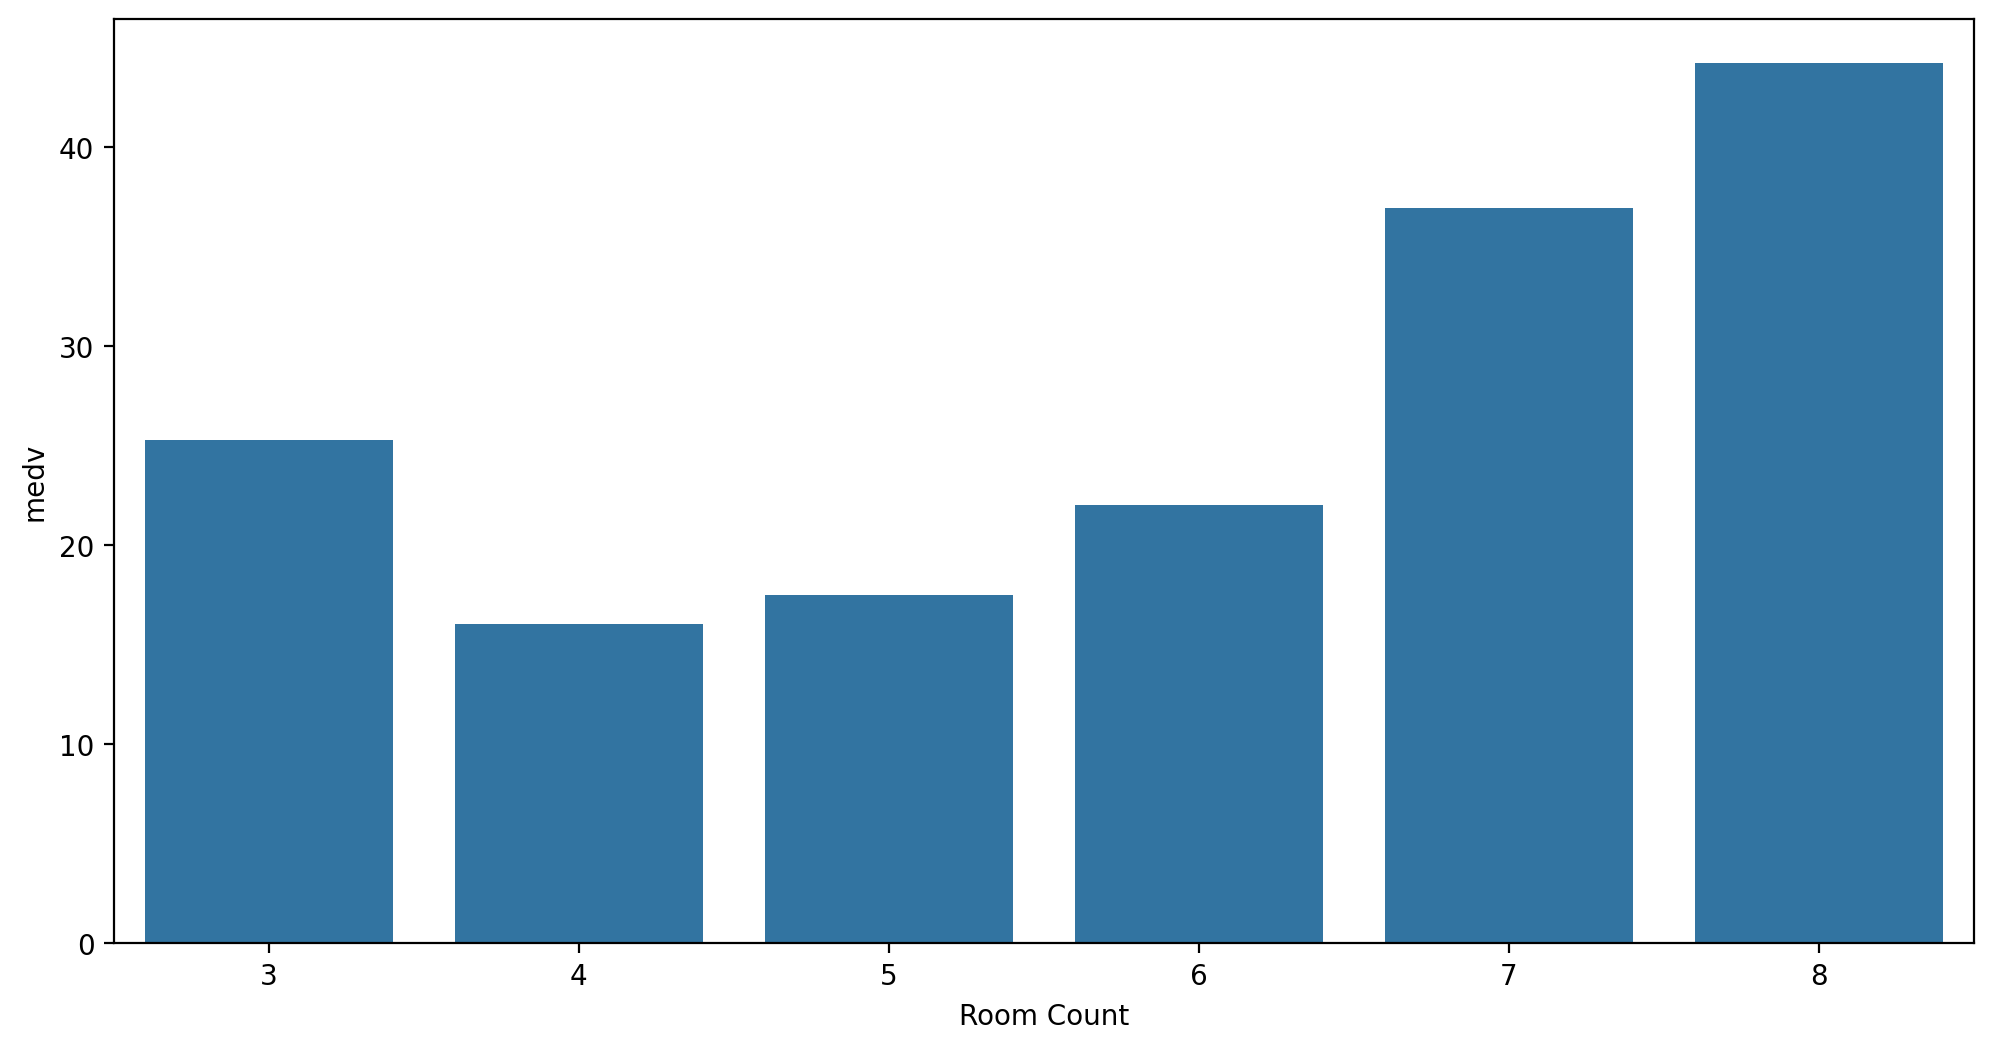

In [14]:
# Создание новых признаков для анализа, округляя 'rm' до целого числа
df['Room Count'] = df['rm'].apply(int)

plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Room Count', y = 'medv', data = df, ci = None)

__С увеличением количества комнат растет средняя стоимость жилья. Наиболее резкий скачок цены наблюдается при переходе от 5 к 6 комнатам, что может указывать на повышенный спрос на жилье такого размера.__

<Axes: xlabel='Age Group', ylabel='medv'>

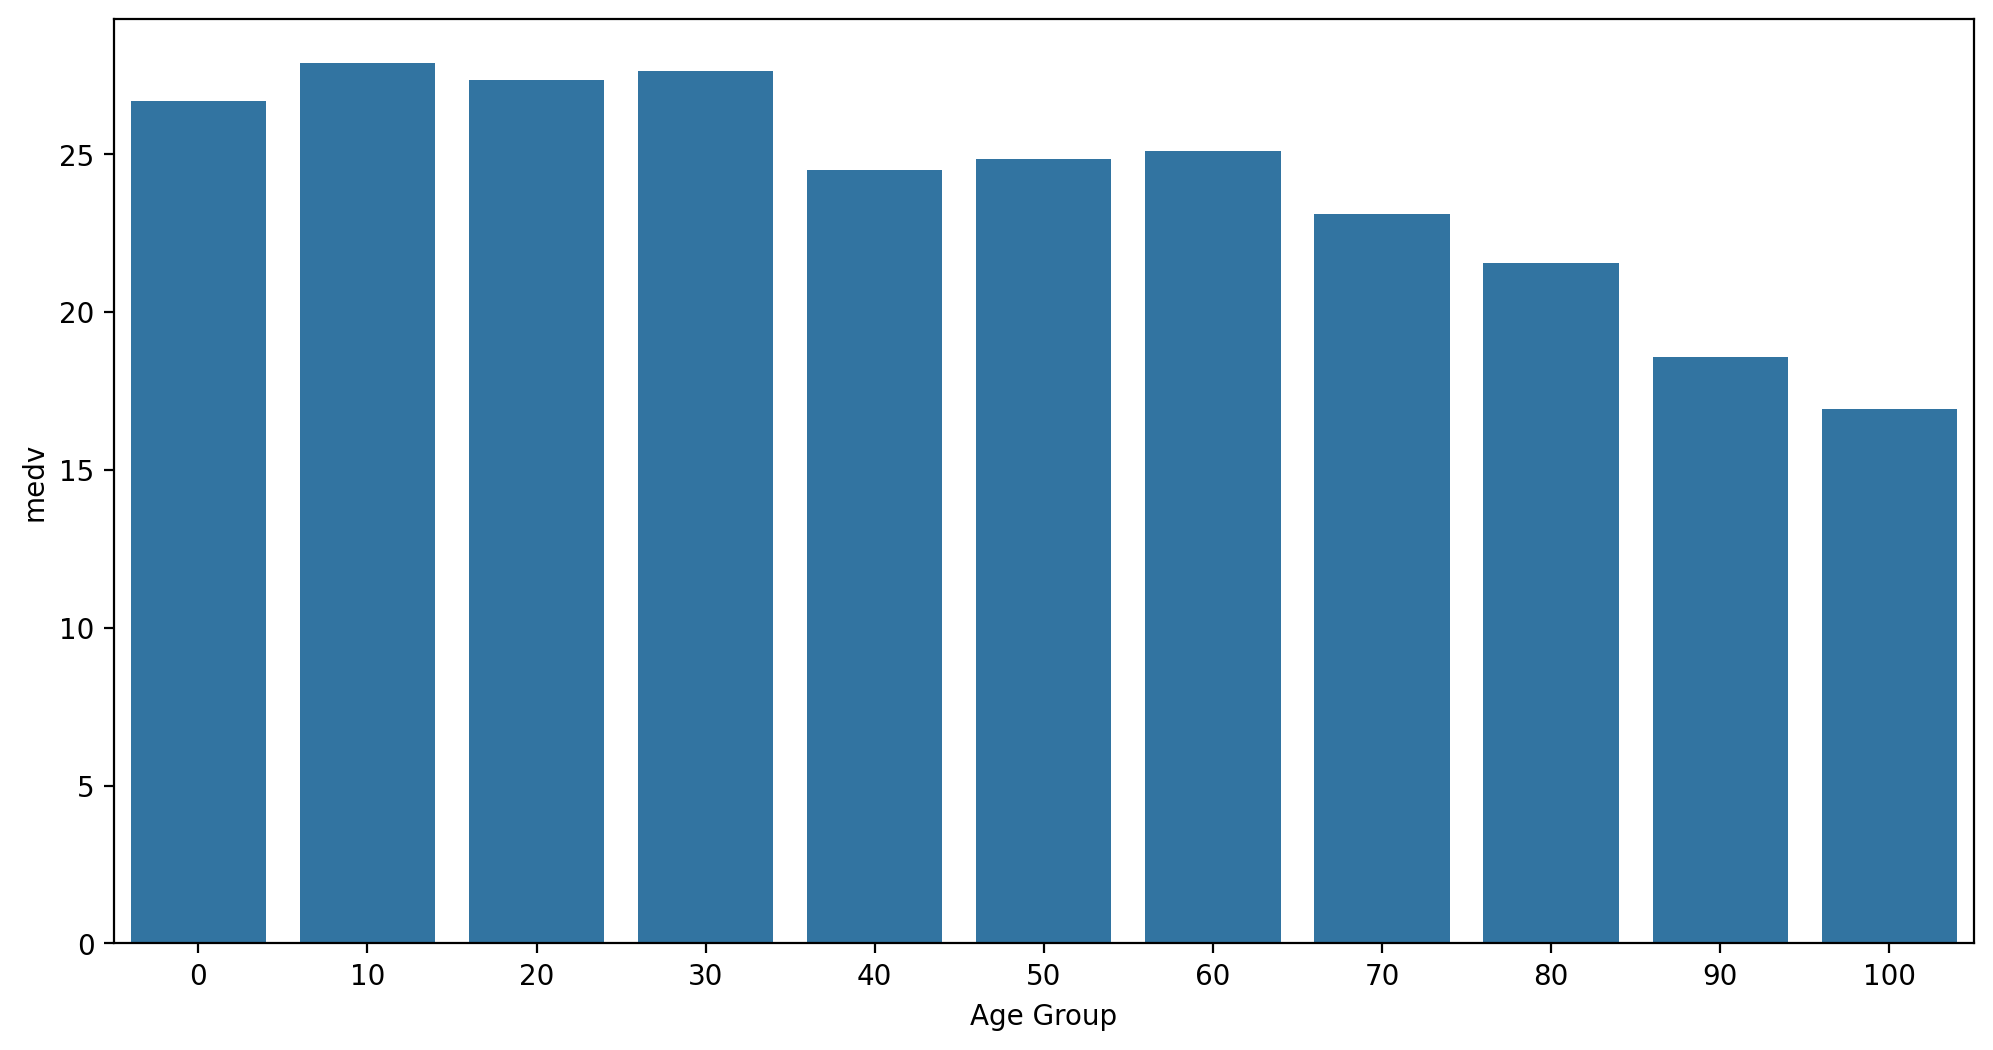

In [15]:
# Здесь создал группы возраста с шагом 10 лет, округлив возраст до ближайшего десятка
df['Age Group'] = df['age'].apply(lambda x: int(x/10)*10)

plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Age Group', y = 'medv', data = df, ci = None)

__Самые дорогие дома - новые (0-30 лет), что соответствует современным стандартам. Дома среднего возраста (40-60 лет) имеют сниженную стоимость, вероятно из-за необходимости ремонта. Самые старые дома (70-100 лет) показывают самый низкий ценовой диапазон, что может указывать на высокие затраты на содержание и устаревшую инфраструктуру__

<Axes: xlabel='LSTAT Group', ylabel='medv'>

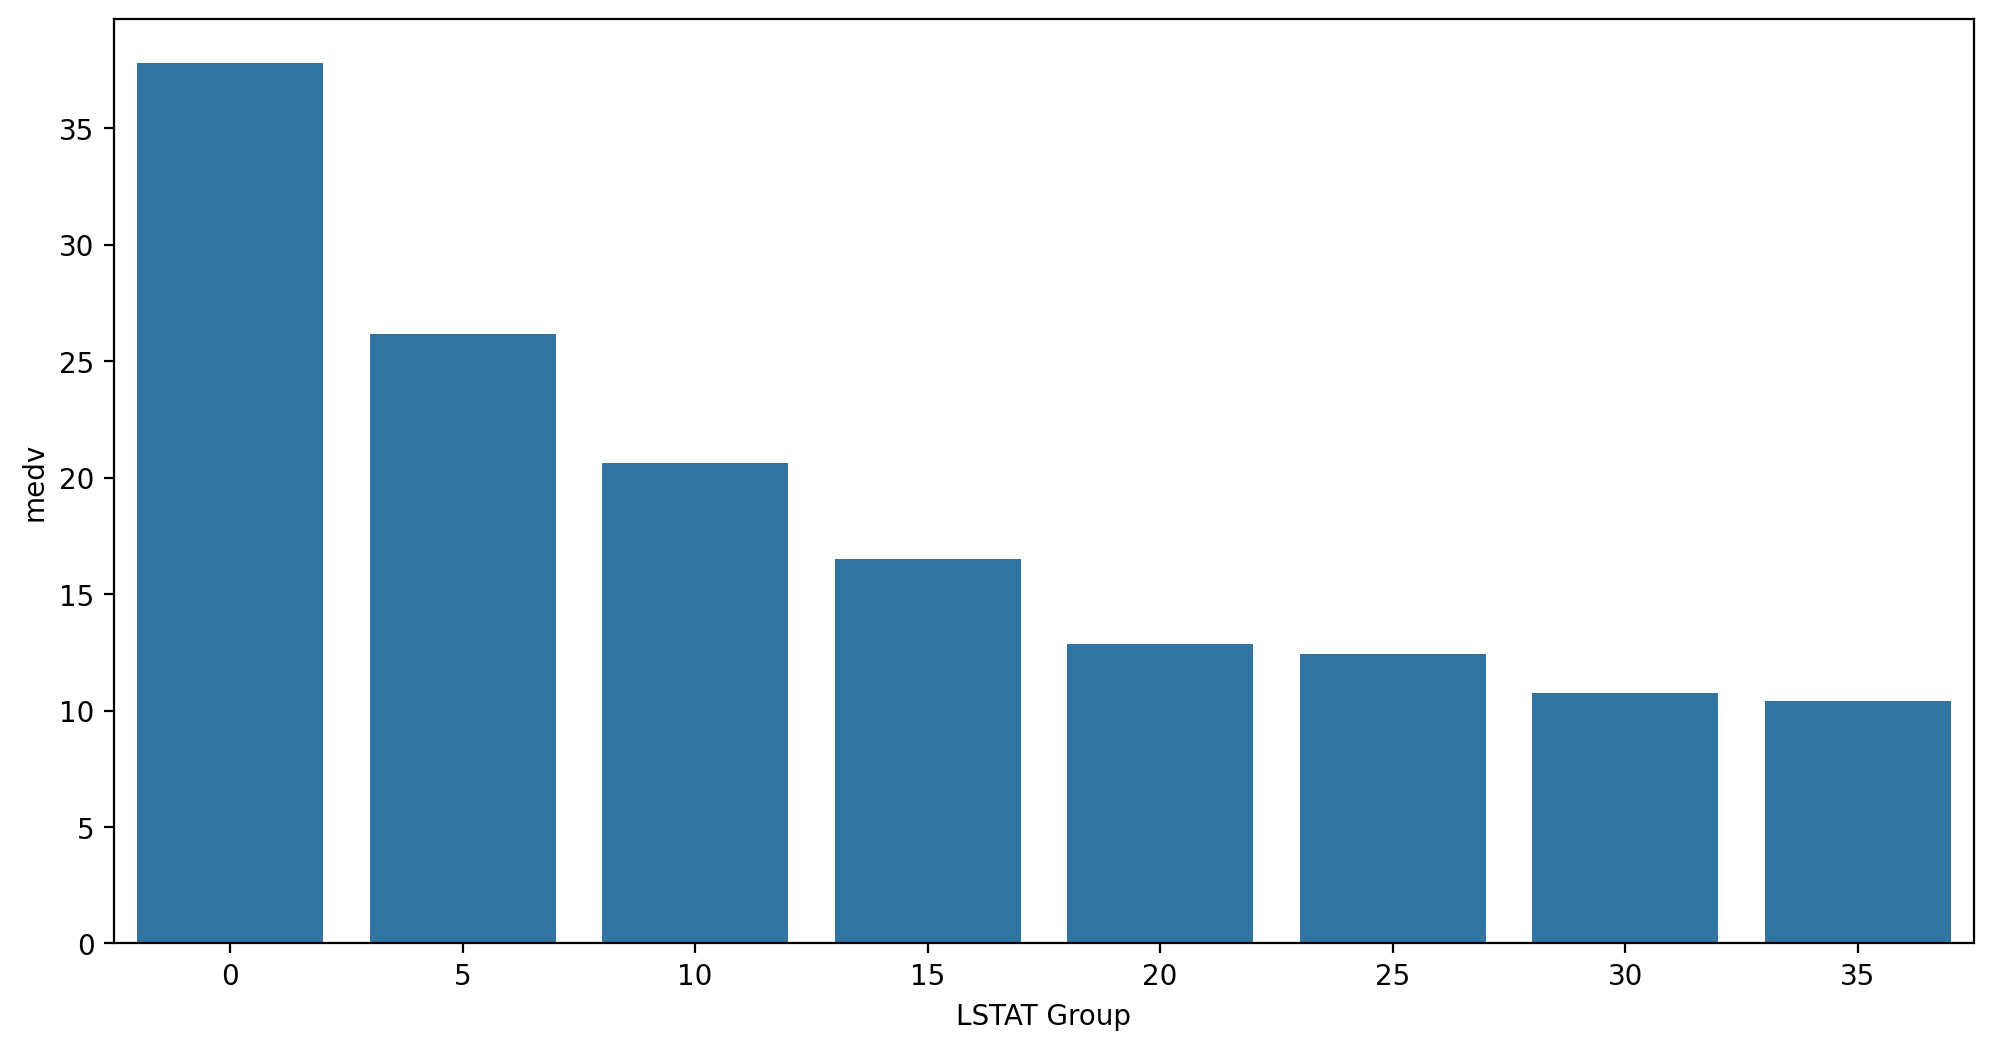

In [16]:
# Группирует процент малоимущих с шагом 5%
df['LSTAT Group'] = df['lstat'].apply(lambda x: int(x/5)*5)

plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'LSTAT Group', y = 'medv', data = df, ci = None)

__Чем выше процент населения с низким социально-экономическим статусом, тем ниже стоимость жилья. В районах с LSTAT > 30% средняя цена падает ниже 10 тысяч долларов__

In [17]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'Room Count', 'Age Group',
       'LSTAT Group'],
      dtype='object')

In [18]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]

y = df['medv']  # Используем medv

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [21]:
lrm.intercept_

31.631084035693046

In [22]:
lrm.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [23]:
predictions = lrm.predict(X_test)

predictions[:10]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345])

In [24]:
y_test[:10].round(3)

173   23.6000
274   32.4000
491   13.6000
72    22.8000
452   16.1000
76    20.0000
316   17.8000
140   14.0000
471   19.6000
500   16.8000
Name: medv, dtype: float64

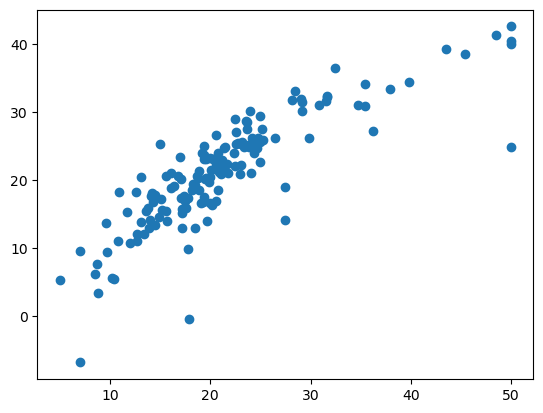

In [25]:
plt.scatter(y_test, predictions)

<Axes: xlabel='medv'>

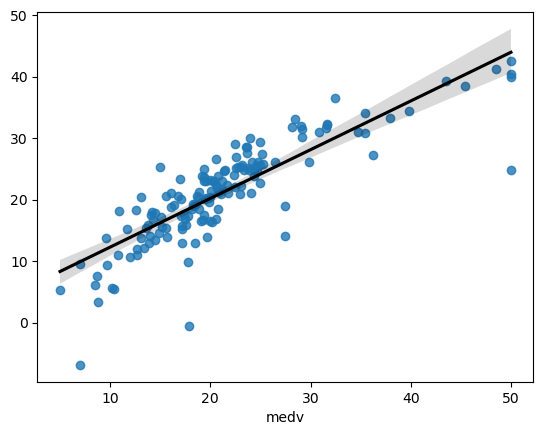

In [26]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='medv', ylabel='Density'>

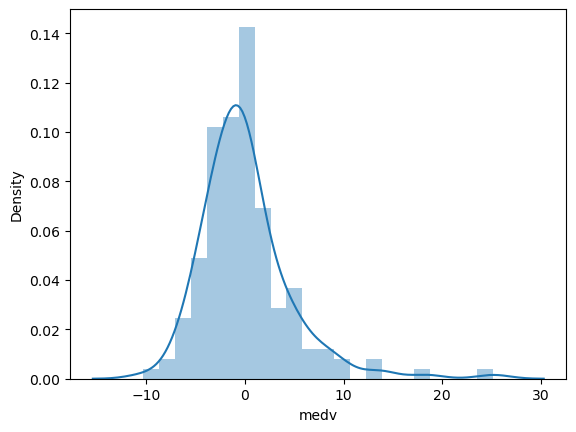

In [27]:
sns.distplot((y_test - predictions))

In [28]:
from sklearn import metrics

In [29]:
print(f"MAE: {metrics.mean_absolute_error(y_test, predictions)}")
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")
print(f"R²: {metrics.r2_score(y_test, predictions)}")

MAE: 3.1627098714574102
MSE: 21.517444231177265
RMSE: 4.638689926172827
R²: 0.7112260057484925


### Вывод по линейной регрессии

#### Линейная регрессия показывает базовый уровень точности. Но недостаточно хорошо справляется со сложными нелинейными взаимосвязями в данных, погрешность около 3-4 тысяч долларов

——————————————————————————————————————————————————————————————————————————

### Классическая модель (XGBoost)

In [30]:
from xgboost import XGBRegressor

In [31]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [32]:
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

In [33]:
print("\nXGBoost результаты:")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions)}")
print(f"MSE: {mean_squared_error(y_test, xgb_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions))}")
print(f"R²: {r2_score(y_test, xgb_predictions)}")


XGBoost результаты:
MAE: 2.084147413780815
MSE: 9.130867339312493
RMSE: 3.02173250624745
R²: 0.8774595623799304


### Выводы по XGBoost

#### XGBoost демонстрирует отличные результаты. Намного лучше, чем линейная регрессия. Ошибка прогнозирования снижена до 2-3 тысяч долларов

——————————————————————————————————————————————————————————————————————————

### Нейронная модель

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  
])

In [38]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [40]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
9/9 [==============================] - 1s 33ms/step - loss: 611.5920 - mae: 22.7864 - mse: 611.5920 - val_loss: 555.4080 - val_mae: 22.0542 - val_mse: 555.4080
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 567.6768 - mae: 21.8387 - mse: 567.6768 - val_loss: 500.8716 - val_mae: 20.8091 - val_mse: 500.8716
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 487.5650 - mae: 19.9626 - mse: 487.5650 - val_loss: 398.6209 - val_mae: 18.2697 - val_mse: 398.6209
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 345.8171 - mae: 16.2638 - mse: 345.8171 - val_loss: 224.9300 - val_mae: 13.0675 - val_mse: 224.9300
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 167.1590 - mae: 10.4658 - mse: 167.1590 - val_loss: 69.0527 - val_mae: 6.1516 - val_mse: 69.0527
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 92.3904 - mae: 7.4543 - mse: 92.3904 - val_loss: 58.4001 - val_mae: 5.5648 -

In [41]:
nn_predictions = model.predict(X_test_scaled).flatten()

In [42]:
print("Нейронная модель:")
print(f"MAE: {mean_absolute_error(y_test, nn_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, nn_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, nn_predictions)):.2f}")
print(f"R²: {r2_score(y_test, nn_predictions):.4f}")

Нейронная модель:
MAE: 2.03
MSE: 10.49
RMSE: 3.24
R²: 0.8593


### Вывод по нейронной модели

#### Нейронная сеть показывает результаты, сопоставимые с XGBoost, но немного уступает по точности

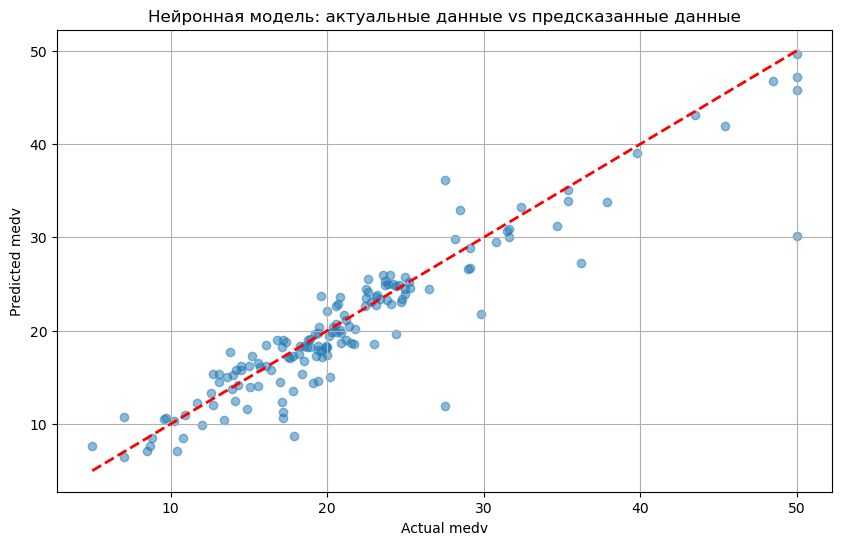

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Нейронная модель: актуальные данные vs предсказанные данные')
plt.grid(True)
plt.show()

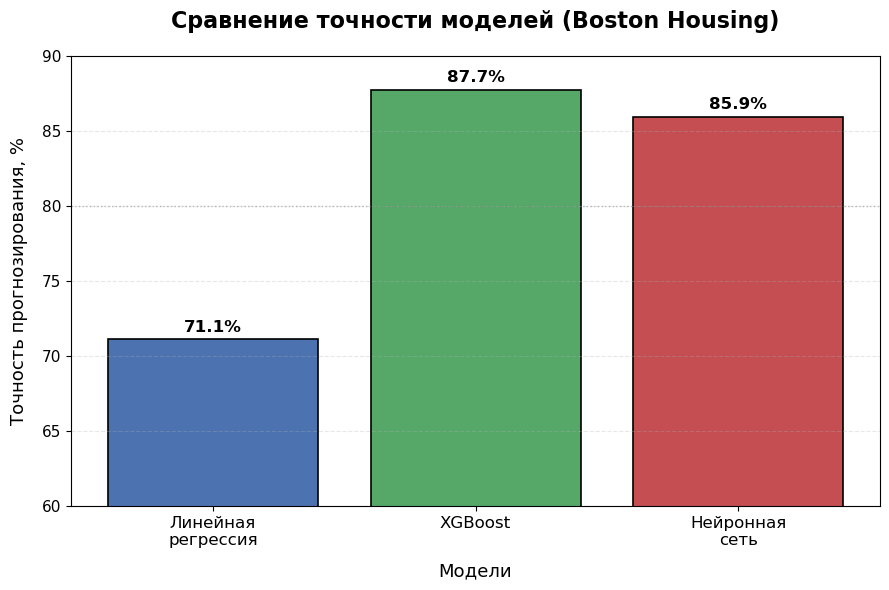


Результаты моделей:
Линейная регрессия: R² = 0.7112 (71.1%)
XGBoost: R² = 0.8775 (87.7%)
Нейронная сеть: R² = 0.8593 (85.9%)


In [44]:
# Рассчитываем точность в процентах (R² * 100)
lr_r2 = metrics.r2_score(y_test, predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

plt.figure(figsize=(9, 6))

# Данные
models = ['Линейная\nрегрессия', 'XGBoost', 'Нейронная\nсеть']
accuracy = [lr_r2 * 100, xgb_r2 * 100, nn_r2 * 100]  # В процентах

# Цвета - более приятная палитра
colors = ['#4C72B0', '#55A868', '#C44E52']  # синий, зеленый, красный

# График
bars = plt.bar(models, accuracy, color=colors, edgecolor='black', linewidth=1.2)

# Цифры на столбцах
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Настройки графика
plt.title('Сравнение точности моделей (Boston Housing)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Точность прогнозирования, %', fontsize=13, labelpad=10)
plt.xlabel('Модели', fontsize=13, labelpad=10)
plt.ylim(60, 90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Улучшаем читаемость осей
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

# Добавляем горизонтальную линию на уровне 80% для наглядности
plt.axhline(y=80, color='gray', linestyle=':', alpha=0.5, linewidth=1)

# Делаем график более плотным
plt.tight_layout()

plt.show()

# Выводим точные значения
print("\nРезультаты моделей:")
print(f"Линейная регрессия: R² = {lr_r2:.4f} ({lr_r2*100:.1f}%)")
print(f"XGBoost: R² = {xgb_r2:.4f} ({xgb_r2*100:.1f}%)")
print(f"Нейронная сеть: R² = {nn_r2:.4f} ({nn_r2*100:.1f}%)")

### Общий вывод

#### XGBoost - лучший выбор для данного набора данных
- __Наивысшая точность (87.7%)__
- __Быстрое обучение и прогнозирование__

Модели с точностью 85-88% позволяют достаточно точно прогнозировать стоимость жилья